In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/campusx-official/fastapi-demo-api/refs/heads/main/insurance.csv")
data.sample(5)

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
57,72,76.8,1.69,1.360000,True,Jalandhar,retired,High
77,67,114.5,1.74,0.610000,True,Mumbai,retired,High
14,49,89.3,1.65,13.505166,False,Kota,government_job,Medium
90,59,54.0,1.60,21.070000,False,Mumbai,business_owner,Low
28,38,101.2,1.79,11.630000,False,Mumbai,unemployed,Low


In [4]:
data['bmi']=data["weight"]/data["height"]**2
data.head(5)

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category,bmi
0,67,119.8,1.56,2.92,False,Jaipur,retired,High,49.227482
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low,30.189017
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low,21.118382
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium,45.535900
4,69,62.2,1.60,3.94,True,Indore,retired,High,24.296875


In [5]:
data.drop(columns=['height','weight'],axis=1,inplace=True)
data.head(5)

,age,income_lpa,smoker,city,occupation,insurance_premium_category,bmi
0,67,2.92,False,Jaipur,retired,High,49.227482
1,36,34.28,False,Chennai,freelancer,Low,30.189017
2,39,36.64,False,Indore,freelancer,Low,21.118382
3,22,3.34,True,Mumbai,student,Medium,45.535900
4,69,3.94,True,Indore,retired,High,24.296875


In [6]:
bins=[0,10,23, 60, 120]
lebels=['child', 'youth', 'adult', 'senior']

data['age']=pd.cut(data['age'],bins=bins, labels=lebels, right=False)
data.head(5)

,age,income_lpa,smoker,city,occupation,insurance_premium_category,bmi
0,senior,2.92,False,Jaipur,retired,High,49.227482
1,adult,34.28,False,Chennai,freelancer,Low,30.189017
2,adult,36.64,False,Indore,freelancer,Low,21.118382
3,youth,3.34,True,Mumbai,student,Medium,45.535900
4,senior,3.94,True,Indore,retired,High,24.296875


In [7]:
data['city'].unique()

array(['Jaipur', 'Chennai', 'Indore', 'Mumbai', 'Kota', 'Hyderabad',
       'Delhi', 'Chandigarh', 'Pune', 'Kolkata', 'Lucknow', 'Gaya',
       'Jalandhar', 'Mysore', 'Bangalore'], dtype=object)

In [8]:
tier_1_cities = ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']

tier_2_cities = ['Chandigarh', 'Gaya', 'Indore', 'Jaipur', 'Jalandhar', 'Kota', 'Lucknow', 'Mysore']


In [9]:
data['city'].loc[10]

'Chennai'

In [10]:
for i in range(len(data['city'])):
    if data['city'].loc[i] in tier_1_cities:
        data['city'].loc[i] = 'Tier 1'
    elif data['city'].loc[i] in tier_2_cities:
        data['city'].loc[i] = 'Tier 2'


C:\Users\shafe\AppData\Local\Temp\ipykernel_23340\632302292.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['city'].loc[i] = 'Tier 2'
C:\Users\shafe\AppData\Local\Temp\ipykernel_23340\632302292.py:5: SettingWithCopyWarning: 
A value

In [11]:
featureToMove= data.pop( 'bmi')
featureToMove

0     49.227482
1     30.189017
2     21.118382
3     45.535900
4     24.296875
        ...    
95    21.420747
96    47.984483
97    18.765432
98    30.521676
99    27.688778
Name: bmi, Length: 100, dtype: float64

In [12]:
data.insert(0, 'bmi', featureToMove)

In [13]:
data

,bmi,age,income_lpa,smoker,city,occupation,insurance_premium_category
0,49.227482,senior,2.92000,False,Tier 2,retired,High
1,30.189017,adult,34.28000,False,Tier 1,freelancer,Low
2,21.118382,adult,36.64000,False,Tier 2,freelancer,Low
3,45.535900,youth,3.34000,True,Tier 1,student,Medium
4,24.296875,senior,3.94000,True,Tier 2,retired,High
...,...,...,...,...,...,...,...
95,21.420747,adult,19.64000,False,Tier 2,business_owner,Low
96,47.984483,adult,34.01000,False,Tier 1,private_job,Low
97,18.765432,adult,44.86000,False,Tier 1,freelancer,Low
98,30.521676,adult,28.30000,False,Tier 1,business_owner,Low


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [16]:
data.head(5)

,bmi,age,income_lpa,smoker,city,occupation,insurance_premium_category
0,49.227482,senior,2.92,False,Tier 2,retired,High
1,30.189017,adult,34.28,False,Tier 1,freelancer,Low
2,21.118382,adult,36.64,False,Tier 2,freelancer,Low
3,45.535900,youth,3.34,True,Tier 1,student,Medium
4,24.296875,senior,3.94,True,Tier 2,retired,High


In [23]:
categorical_features = ["age","smoker",  "occupation", "city"]
numeric_features = ["bmi", "income_lpa"]

In [24]:
categorical_features


['age', 'smoker', 'occupation', 'city']

In [25]:
preprocess=ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [26]:
pipeline=Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', DecisionTreeClassifier())
])

In [27]:
X=data.drop('insurance_premium_category',axis=1)
y=data['insurance_premium_category']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [28]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
y_pred=pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.65
Confusion Matrix:
 [[8 0 4]
 [0 2 1]
 [1 1 3]]


Text(0.5, 1.0, 'Confusion Matrix')

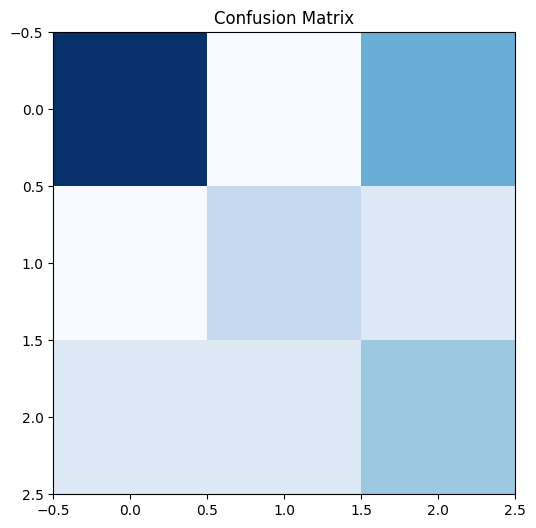

In [30]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

In [31]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(pipeline,f)